## Market price prediction using Technical Indicators 

In [3]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

In [26]:
dataset=pd.read_csv("BSE.csv",
                    usecols=[ 'open', 'high', 'low',  
        'volume', 'SMA', 'EMA','WMA', 'DEMA', 'TEMA', 'TRIMA', 'KAMA', 
        'MAMA-FAMA', 'MAMA-MAMA', 'T3','MACD-MACD', 'MACD-MACD_Hist',
        'MACD-MACD_Signal', 'MACDEXT-MACD','MACDEXT-MACD_Hist', 'MACDEXT-MACD_Signal',
        'SlowD', 'SlowK','STOCHF-FastD', 'STOCKF-FastK', 'RSI', 'STOCHRSI-FastD',
       'STOCHRSI-FastK', 'WILLR', 'ADX', 'ADXR', 'APO', 'PPO']
                   )
dataset.head()

,open,high,low,volume,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA-FAMA,MAMA-MAMA,T3,MACD-MACD,MACD-MACD_Hist,MACD-MACD_Signal,MACDEXT-MACD,MACDEXT-MACD_Hist,MACDEXT-MACD_Signal,SlowD,SlowK,STOCHF-FastD,STOCKF-FastK,RSI,STOCHRSI-FastD,STOCHRSI-FastK,WILLR,ADX,ADXR,APO,PPO
0,36304.4297,36389.2188,36082.9688,23300,35600.2137,35626.1063,35688.0792,35939.9651,36045.0672,35488.1156,35413.5281,32358.9670,35330.8608,35547.6043,188.5727,133.0520,55.5207,535.9070,41.5225,494.3845,81.9891,89.8132,89.8132,86.9458,68.7552,100.0000,100.000,-13.0542,18.9468,19.0408,535.9070,1.5310
1,35997.2891,36253.8516,35946.2383,40500,35484.3457,35475.3678,35538.9730,35708.2344,35755.7004,35453.6277,35283.2561,32344.0328,35321.0268,35481.7709,127.9984,105.7407,22.2577,505.4852,31.3041,474.1811,66.3145,85.4471,85.4471,93.8546,64.6462,80.2607,100.000,-6.1454,16.8818,18.0749,505.4852,1.4478
2,35635.5195,35822.1602,35605.3398,27500,35417.6309,35359.3853,35433.5806,35528.0176,35521.7972,35447.7939,35238.7724,32329.0730,35314.1959,35431.2736,80.0943,84.2717,-4.1774,496.6389,48.4020,448.2369,45.2635,70.7071,70.7071,88.6392,58.9192,46.9273,100.000,-11.3608,15.0797,17.6229,496.6389,1.4246
3,35394.7695,35555.1602,35262.9688,19100,35338.6980,35298.0221,35379.6131,35442.7651,35411.2731,35429.2964,35209.0663,32314.0724,35310.9502,35385.2966,54.6209,79.8662,-25.2454,506.4294,94.7961,411.6333,30.1235,42.7894,42.7894,73.8474,54.5052,13.5940,40.782,-26.6597,14.9778,18.2013,506.4294,1.4544
4,35118.0898,35397.2383,34896.0703,19200,35327.9699,35276.5227,35367.4677,35431.9313,35404.1068,35395.6194,35207.5662,32299.0127,35310.1035,35331.0771,45.8258,91.0377,-45.2119,492.9727,132.4216,360.5511,34.4318,22.2940,22.2940,49.6347,48.8170,12.1071,0.000,-40.5319,16.4131,20.0469,492.9727,1.4155


In [27]:
dataset.shape

(2695, 32)

In [36]:
X=dataset.iloc[:,:].values
Y= pd.read_csv("BSE.csv",
               usecols=['close']).iloc[:,:].values
# Now that we have set our X and Y 

### The Durbin Watson autocorrelation testing 

Brief notes on Durbin watson test. **Source**: [Wikipedia article on Durbin Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)

\begin{equation}
\frac{\sum_{t=2}^T((e_t - e_{t-1})^2))}{\sum_{t=1}^Te_t^2}
\end{equation}

**Here** 
**T**- Number of observations where e_t is the residual associated with the observation at time t with respect to an OLS regression. 

Durbin watson measures similarity of data over time series t
The Hypotheses for the Durbin Watson test are:
H0 = no first order autocorrelation.
H1 = first order correlation exists.

The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

   1. 2- is no autocorrelation.
   2. 0 to <2 is positive autocorrelation (common in time series data).
   3. \>2 to 4 is negative autocorrelation (less common in time series data).


In [37]:
import math
def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)
def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff
    return diffprod / math.sqrt(xdiff2 * ydiff2)

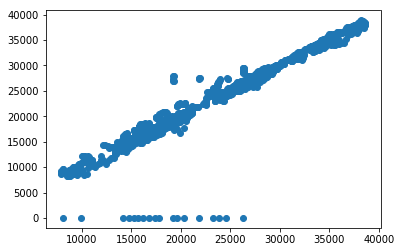

In [48]:
plt.scatter(X[:,4],Y)
plt.show()